<a href="https://colab.research.google.com/github/ROSEBURTON/ROSEBURTON/blob/main/Image_Guesser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

def predict_image_content(image_url):
    req = urllib.request.urlopen(image_url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)

    input_shape = (224, 224)
    img_resized = cv2.resize(img, input_shape)
    img_preprocessed = preprocess_input(img_resized)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    model = MobileNetV2(weights="imagenet")
    img_expanded = np.expand_dims(img_preprocessed, axis=0)
    predictions = model.predict(img_expanded)
    top_predictions = decode_predictions(predictions, top=3)[0]

    print("Top Predictions:")
    for pred_class, pred_desc, pred_score in top_predictions:
        print(f"{pred_desc} ({pred_class}): {pred_score * 100:.2f}%")


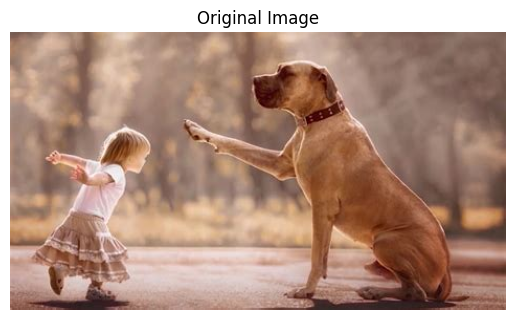

35363/35363 [==============================] - 0s 0us/step
Top Predictions:
Great_Dane (n02109047): 47.99%
Weimaraner (n02092339): 17.52%
boxer (n02108089): 8.01%


In [2]:
image_url = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.SwDr4HxMCgTLKSNHvAZ-wgHaEK%26pid%3DApi&f=1&ipt=2ee0a05a28e5182693a83c29c0f1e599cd49f33f2b101fe1745b3b22a940fa51&ipo=images"
predict_image_content(image_url)

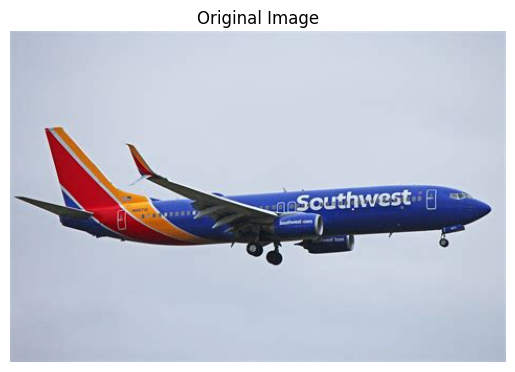

1/1 [==============================] - 1s 870ms/step
Top Predictions:
airliner (n02690373): 97.40%
wing (n04592741): 0.45%
airship (n02692877): 0.17%


In [8]:
image_url = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.p_VblGCqdm69h2r-cyzrhAHaE8%26pid%3DApi&f=1&ipt=51fd472985a7790dabc8a63bf17ad49090cc9cf3dc75123e2eca729bfd1ba78c&ipo=images"
predict_image_content(image_url)

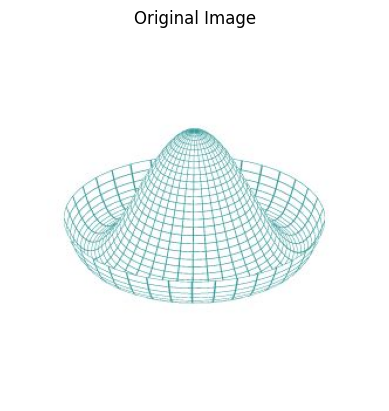

1/1 [==============================] - 1s 888ms/step
Top Predictions:
hair_slide (n03476684): 14.57%
shopping_basket (n04204238): 7.35%
electric_fan (n03271574): 4.69%


In [4]:
image_url = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIF.TqrnR78OYE5owlWWtJtWZQ%26pid%3DApi&f=1&ipt=f2614af3b204c47d91d9c1a15a33cfb119df2fad1af2689789cdc9b9568598c9&ipo=images"
predict_image_content(image_url)